# Quantum Verification Hand-on

## Setup and Installation

To install MQT QCEC run:
```console
pip install mqt.qcec
```
in your preferred virtual environment.

## Checking the equivalence of two circuits

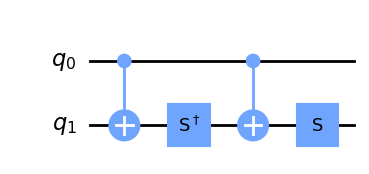

In [7]:
from qiskit import QuantumCircuit
import numpy as np
import numpy as np
from qiskit import *
from qiskit import Aer


qc3 = QuantumCircuit(2)
qc3.cnot(0,1)
qc3.sdg(1)
qc3.cnot(0,1)
qc3.s(1)


qc3.draw(output="mpl")

Operator([[ 0.707+0.j,  0.   +0.j,  0.707-0.j,  0.   +0.j],
          [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707-0.j],
          [ 0.707+0.j,  0.   +0.j, -0.707+0.j,  0.   +0.j],
          [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


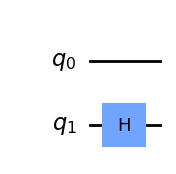

In [13]:
qc4 = QuantumCircuit(2)
# qc4.sdg(1)
# qc4.cnot(0,1)
qc4.h(1)

# qc4.s(1)
# qc4.cnot(0,1)

backend = Aer.get_backend('unitary_simulator')

job = execute(qc4, backend)
result = job.result()

print(result.get_unitary(qc4, decimals=3))

qc4.draw(output="mpl")

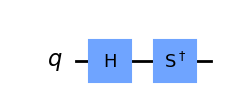

In [142]:
qc5 = QuantumCircuit(1)

qc5.h(0)
qc5.sdg(0)
qc5.draw(output="mpl")

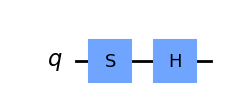

In [143]:
qc6 = QuantumCircuit(1)

qc6.s(0)
qc6.h(0)
qc6.draw(output="mpl")

## Using Qiskit to verify the equivalence

In [4]:
from qiskit.quantum_info import Operator

op1 = Operator(qc3)
# print(op1)
op2 = Operator(qc4)
# print(op2)
print(f"Are the two operators equivalent? {op1 == op2}")

# op3 = Operator(qc5)
# # print(op3)
# op4 = Operator(qc6)
# # print(op4)
# print(f"Are the two operators equivalent? {op3 == op4}")

Are the two operators equivalent? False


## Verification using MQT QCEC

In [5]:
from mqt import qcec

qcec.verify(qc3, qc4)

# qcec.verify(qc5, qc6)

{
  "check_time": 0.008371454,
  "equivalence": "not_equivalent",
  "parameterized": {
    "performed_instantiations": 0
  },
  "preprocessing_time": 0.000576627,
  "simulations": {
    "performed": 3,
    "started": 4
  }
}